# Conteúdo
Este projeto está dividido no seguntes itens:

1) Importações iniciais;

2) Considerações iniciais sobre os dados;

3) Manipulações dos dados (separando informações, analisando dados faltantes, conversões de dados temporais);

4) Análises e visualizações.


__________________________________
### 1) Importações iniciais
Para esse projeto, foram utilizadas as seguintes bibliotecas de análise e visualização de dados:

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Os dados são originários da plataforma Kaggle, e estão disponíveis no formato .csv. Assim, após fazer o download do arquivo, podemos criar o dataframe 

In [46]:
df = pd.read_csv('.../911.csv')

Podemos confirmar que o dataframe foi criado e, ao mesmo tempo analisar o a estrutura geral dos dados.

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Em uma análise inicial, podemos observar alguns pontos relevantes: a coluna zip, que contem o zipcode do local de cada ocorrência, os números estão em formato float. Outro ponto relevante da coluna zip é apresença de elementos faltantes (NaN). Isso é importante pois qualquer análise feita sobr essa coluna vai precisar levar em conta a ausência de informação. Mais adiante iremos analisar se será necessário manipular estes dados faltantes. 

____________________________
### 2) Análise inicial dos dados

Vamos fazer algumas observações preliminares dos dados.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Observamos que tanto a coluna zip quanto a coluna twp (que representa os municípios do contado de Montgomery onde ocorreram as ocorrências) apresentam valores faltantes ou nulos.

Outro ponto importante para observarmos é o tipo dos dados. A coluna timeStamp (que apresenta do a data e hora da chamada de emergência) está representada com o formato object, armazenado no dataframe como uma string. Assim, vamos precisar modificar o tipo dessa coluna se quisermos fazer análises mais precisas. Veremos isso mais adiante.

In [49]:
type(df['timeStamp'].iloc[0])

str

________________
### 3) Manipulação dos dados

Como observado acima, o dataframe possui duas colunas contendo valores NaN, além da coluna timeStamp que apresenta tipo string, não idel apara nossa análise. Dessa forma, algumas considerações precisam ser feitas:
- Estas colunas são necessárias para nossa análise?
- Se sim, o que podemos fazer para corrigí-las?
- Se não, podemos simplesmente eliminá-las?
- Alguma outra informação do dataframe pode ser manipulada de forma a deixar o conjunto de dados mais apresentável?


Podemos inicialmente verificar a quantidade de valores NaN nas duas colunas em questão:

In [50]:
zip_falt = df['zip'].isna().sum()
print(f'Quantidade de itens NaN na coluna "zip": {zip_falt}')
zip_porcent = round((zip_falt *100 )/ len(df),2)
print(f'Porcentagem de itens NaN na coluna "zip": {zip_porcent}%')

Quantidade de itens NaN na coluna "zip": 80199
Porcentagem de itens NaN na coluna "zip": 12.09%


In [51]:
twp_falt = df['twp'].isna().sum()
print(f'Quantidade de itens NaN na coluna "twp": {twp_falt}')
twp_porcent = round((twp_falt *100 )/ len(df),2)
print(f'Porcentagem de itens NaN na coluna "twp": {twp_porcent}%')

Quantidade de itens NaN na coluna "twp": 293
Porcentagem de itens NaN na coluna "twp": 0.04%


Observamos que na coluna 'zip', a quantidade de valores NaN é considerável, representando cerca de 12% do total de linhas do nosso dataframe. No caso da coluna 'twp', apenas 0,04% dos dados estão faltando.

A quantidade de itens faltantes na coluna 'zip' é considerável. No entanto, essa informação pode ser desconsiderada da nossa análise, pois nosso dataframe já apresenta informações de endereço ('addr'), e se necessário temos as coordenadas ('lat' e 'lng').

Em contrapartida, na coluna 'twp' a quantidade de itens faltantes é pequena, assim podemos manter essa informação para utilizarmos mais adiante.

______
o proximo elemento que podemos analisar é a coluna timeStampe. Como já indicado anteriormente, os dados estão inseridos como string. Isso pode restringir as análises feitas em cima destas informações temporais. Assim, podemos trabalhar como essta coluna para torná-la mais 'legível'.

In [52]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [53]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Com isso, transformamos a coluna timeStamp em datetime. Assim, podemos modificar o dataframe. Vamos separar a hora, o mês, o ano e o dia da semana de cada chamada, acrescentando essa informação em colunas separadas.

In [54]:
df['Hora'] = df['timeStamp'].apply(lambda time: time.hour)
df['Mes'] = df['timeStamp'].apply(lambda time: time.month)
df['Ano'] = df['timeStamp'].apply(lambda time: time.year)
df['Dia Semana'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [55]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hora,Mes,Ano,Dia Semana
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,2015,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,2015,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,2015,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,2015,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,2015,3


Podemos ver que tanto o mês quanto o dia da semana estão apresentados como números. Podemos escrever os dias e meses, deixando o dataframe mais apresentável.

In [56]:
dmap = {0:'01 Seg',1:'02 Ter',2:'03 Qua',3:'04 Qui',4:'05 Sex',5:'06 Sab',6:'07 Dom'}
df['Dia Semana'] = df['Dia Semana'].map(dmap)

In [57]:
mmap = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',5:'Mai',6:'Jun',7:'Jul',8:'Ago',9:'Set',10:'Out',11:'Nov',12:'Dez'}
df['Mes'] = df['Mes'].map(mmap)

In [58]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hora,Mes,Ano,Dia Semana
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,Dez,2015,04 Qui
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,Dez,2015,04 Qui
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,Dez,2015,04 Qui
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,Dez,2015,04 Qui
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,Dez,2015,04 Qui


Agora, passamos para a coluna 'title', que contem o título da emergência, com a categoria (EMS, Fire ou Traffic) e uma descrição inicial.

Observando o dataframe, verificamos que existem diversos tipos diferentes de ocorrência registradas. No entanto, podemos constatar que todas elas estão separadas em três categorias distintas  (EMS-emergências médicas, Fire-incêndios ou Traffic-trânsito). Assim, podemos criar uma nova coluna no dataframe para separar essas diferentes categorias.

In [60]:
df['Categoria'] = df['title'].str.split(":").str[0]

In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hora,Mes,Ano,Dia Semana,Categoria
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,Dez,2015,04 Qui,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,Dez,2015,04 Qui,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,Dez,2015,04 Qui,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,Dez,2015,04 Qui,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,Dez,2015,04 Qui,EMS


Assim, temos a divisão das ocorências em EMS (Emergency Medical Services), Fire e Traffic

In [62]:
df['Categoria'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

Além disso, podemos separar as diferentes ocorrências, especificando cada chamada 

In [63]:
 df['Categoria detalhe'] = df['title'].str.split(":", expand=True)[1].str.replace(' -', '')

In [64]:
df['Categoria detalhe'].value_counts()

 VEHICLE ACCIDENT         184749
 DISABLED VEHICLE          47917
 FIRE ALARM                38452
 FALL VICTIM               34683
 RESPIRATORY EMERGENCY     34250
                           ...  
 BOMB THREAT                   2
 HIT + RUN                     1
 PRISONER IN CUSTODY           1
 FOOT PATROL                   1
 ANIMAL COMPLAINT              1
Name: Categoria detalhe, Length: 88, dtype: int64

Por ultimo, a coluna 'e' não é relevante para nossa análise. Podemos removê-la.

In [65]:
df = df.drop('e', axis=1)

# 4) Análises e visualizações

Podemos começar a analisar os dados, respondendo algumas questões relevantes.

#### 1) Dentre as categorias de emergência registradas, qual  é a mais recorrente?

In [66]:
df['Categoria'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Categoria, dtype: int64

<AxesSubplot:xlabel='Categoria', ylabel='count'>

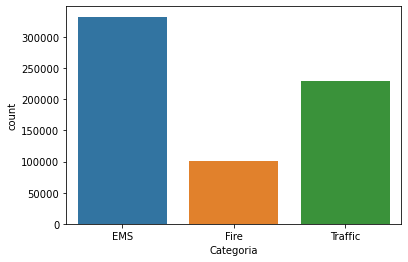

In [67]:
sns.countplot(x='Categoria', data=df)

Podemos observar que Emergências médicas (EMS) representam mais da metade das chamadas de emergência.
Podemos verificar a quantidade das chamadas especificas.

<AxesSubplot:xlabel='Categoria detalhe', ylabel='count'>

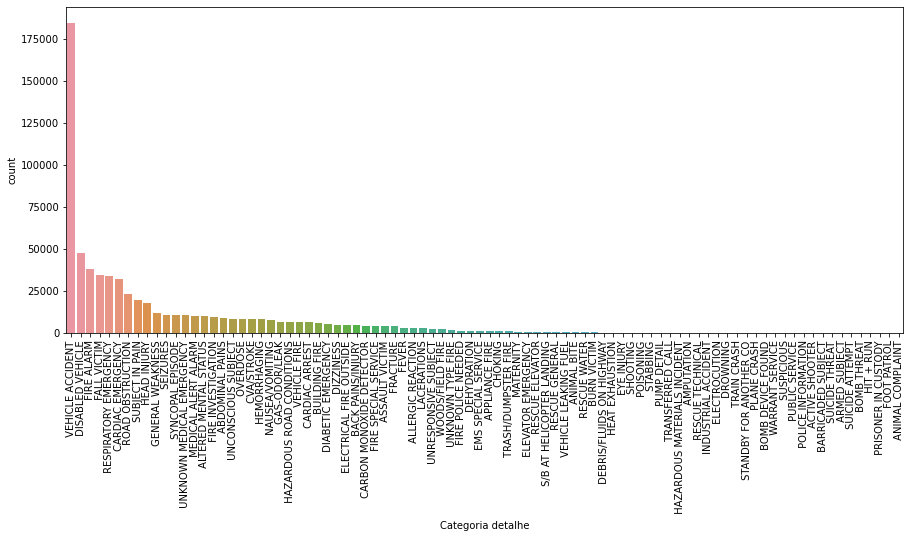

In [68]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(x='Categoria detalhe', data=df, order = df['Categoria detalhe'].value_counts().index)

Observamos que acidentes veiculares são a grande maioria das chamadas, com mais de 184000 ocorrências no periodo analisado.

#### 2) Como é a distribuição dessas categorias de chamada durante a semana? E durante o mês? podemos ver alguma tendência?

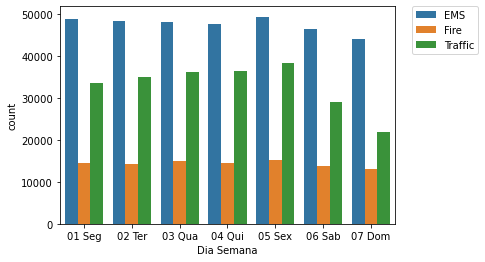

In [69]:
sns.countplot(x='Dia Semana', data=df, hue='Categoria', order=['01 Seg','02 Ter','03 Qua','04 Qui','05 Sex','06 Sab','07 Dom'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Podemos ver que EMS e Fire apresentam uma distribuição constante durante todos os dias da semana. No entanto, observa-se uma diminuição das chamadas de acidentes de trânsito (Traffic) durante o final de semana, principalmente no Domingo. Isso pode ser em decorrencia de uma diminuição da quantidade de veículos trafegando durante o final de semana. No entanto, um estudo mais aprofundado seria necessário para comprovar esta tendência e chegar a uma conclusão mais definitiva. Os dados utilizados nesse projeto não possibilitam obter maiores informações sobre o assunto.

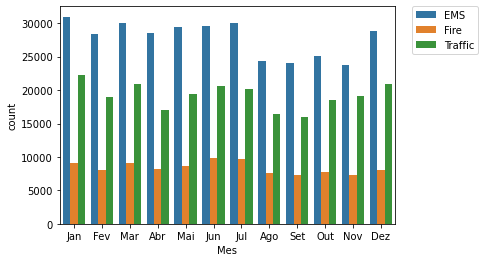

In [70]:
sns.countplot(x='Mes', data=df, hue='Categoria', order=['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Quando analisamos as ocorrências por mês, podemos perceber uma redução leve no número de ocorrencias de emergência médica entre os meses de Agosto e Novembro. Por mais sutil que pareça, essa redução é interessante pois pois indica uma tendência diferente dos outros mese do ano. É uma informação que pode ser útil aos gestores do condado de Montgomery.

#### 3) Quais municípios apresentam maior quantidade de chamadas?

<AxesSubplot:xlabel='twp', ylabel='count'>

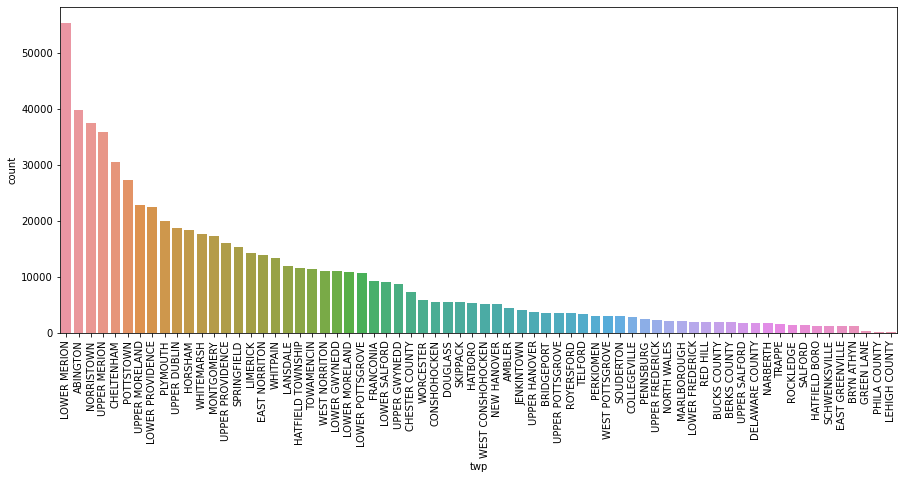

In [72]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(x='twp', data=df, order = df['twp'].value_counts().index)

In [73]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Podemos verificar que, quando analisamos a quantidade de chamadas por município do condado, Lower Merion apresenta maior quantidade de chamadas, seguido de Abington e Norristown. 

#### 4) Qual o horário do dia com maior ocorrências?
Para isso, vamos utilizar uma visualização por heatmap. Para isso, precisamos reestruturar o dataframe, para que a a

In [74]:
dayHour = df.groupby(by=['Dia Semana','Hora']).count()['Categoria'].unstack()
dayHour.head()

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dia Semana,,,,,,,,,,,,,,,,,,,,,
01 Seg,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
02 Ter,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
03 Qua,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
04 Qui,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
05 Sex,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834


<AxesSubplot:xlabel='Hora', ylabel='Dia Semana'>

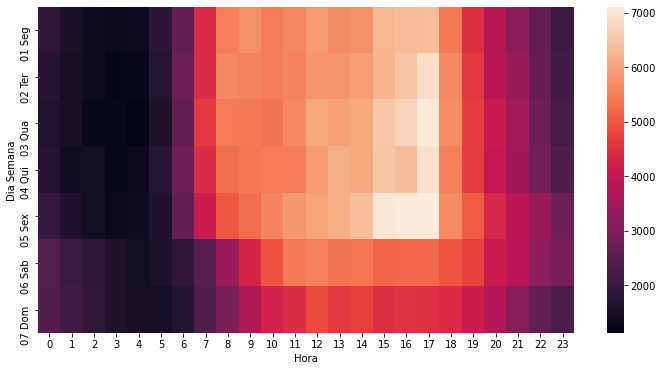

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

Podemos ver que, de acordo com o Heatmap, o período entre 14h30 e 17h30 apresenta maior quantidade de ocorrências.

______________________________
# Conclusão
A partir das análises realizadas, podemos obter algumasinformações importantes:
- O município de Lower Merion possui o maior número de chamadas ao serviço de emergência 911 no período analisado;
- Acidentes veiculares representam a larga maioria das chamadas, seguido por pane de veículos e chamadas de alarmes de incendio;
- Nos finais de semana, a quantidade de chamadas relacionadas com o trânsito apresenta leve redução;
- Entre os meses de Agosto e Novembro, observou-se uma redução no numero de emergÊncias médicas;

Todas estas conclusões são iniciais, resultado do dados utilizados. Resultados mais conclusivos precisam de análises mais específicas dos municípios, um período maior de estudo e informações mais detalhadas das ocorrências.

No entanto, o intuido deste projeto foi de realizar uma análise exploratória dos dados, utilizando conhecimentos de python e análise de dados, e com isso obtivemos algumas informações interessantes que poderiam ser utilizadas por gestores do condado de Montgomery em suas tomadas de decisão no que diz respeito às chamadas do serviço de emergência 911.